In [2]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

%matplotlib inline

In [3]:
def which_part(t,n):
    #Is this the same as int(n*t)?

    for k in range(n):
        if t < (k+1)/n: #means that t<(k+1)/n but t>= k/n
            return k
    

def div(n,k):

    return (n - (n%k) )/k

def bezier_section(points,t):
    #print(points)
    p0,p1,p2,p3 = points

    return (1-t)*(1-t)*(1-t)*p0 + 3*(1-t)*(1-t)*t*p1 + 3*(1-t)*t*t*p2 + t*t*t*p3


def bezier(points,t):

    n_points = len(points)

    if n_points < 4:
        raise ValueError("Not enough points for cubic bezier")
    elif n_points < 7:
        return bezier_section(points[:4],t)
    else:
        n_sections = int(div(n_points-1,3))
        n_selected = 3*n_sections + 1
        selected_pts = points[:n_selected]

        n_part = int(n_sections*t)

        t_fraction = n_sections*t - n_part
        #print(t_fraction)
        #print(n_part)
        return bezier_section(selected_pts[3*(n_part):3*(n_part+1) + 1],t_fraction)



In [44]:
class Bezier:

    def __init__(self,n=10,ptlist=None):

        if ptlist is None:
            self.points = []
            self.generate_points(n)
        else:
            self.points = ptlist[:]
            self.__process_points()

    def __process_points(self):

        n_points = len(self.points)

        if n_points < 4:
            raise ValueError("Not enough points for cubic bezier")
        else:
            self.n_sections = int(div(n_points-1,3))
            n_selected = 3*self.n_sections + 1
            self.selected_pts = self.points[:n_selected]

    def smoothen(self):

        for i in range(len(self.points)):
 
            if (i>1) and (i%3 == 1):

                p0 = self.points[i-2]
                center = self.points[i-1]
                p1 = self.points[i]

                pmean = 0.5*(p0+p1) - center
                pperp = np.array([-pmean[1],pmean[0]])
                
                newp0 = center - pperp
                newp1 = center + pperp

                self.points[i-2] = newp0
                self.points[i] = newp1
                
        self.__process_points()

    def add_point(self,point):
        self.points.append(point)


    def generate_points(self,n_points=10):

        for i in range(n_points):

            if (i%3 == 1) and (i>1): #choose this one collinear with the previous two to ensure smoothness

                p0 = self.points[-2]
                p1 = self.points[-1]
                pt = 2*p1 - p0
            else:
                pt = rng.random(2)
            
            self.add_point(pt)

        self.__process_points()
            
    def map(self,func):

        return Bezier(ptlist=[func(point) for point in self.points])


    def evaluate(self,t):

        if t<=0:
            return self.selected_pts[0]
        elif t>=1:
            return self.selected_pts[-1]

        n_part = int(self.n_sections*t)

        t_fraction = self.n_sections*t - n_part
        #print(t_fraction)
        #print(n_part)
        return bezier_section(self.selected_pts[3*(n_part):3*(n_part+1) + 1],t_fraction)



In [42]:
curve = Bezier(10)

Ts = np.linspace(0,1,500)
points = np.array([curve.evaluate(t) for t in Ts])
control_points = np.array(curve.points)

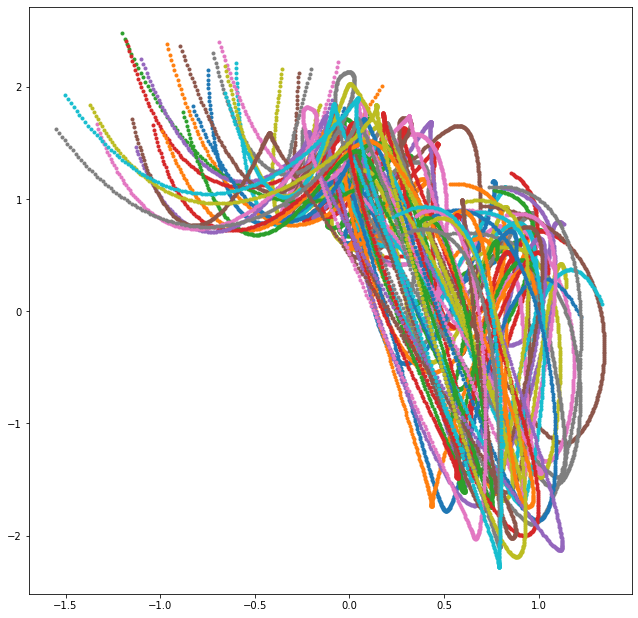

In [47]:
dt = 0.5
n_iter = 50

fig, ax = plt.subplots()
fig.set_size_inches(10.8,10.8)
fig.patch.set_alpha(1)

for i in range(n_iter):

    curve = curve.map(lambda v: v+ dt*(rng.random(2)-0.5))
    curve.smoothen()
    points = np.array([curve.evaluate(t) for t in Ts])

    ax.plot(points[:,0],points[:,1],'.')
#ax.scatter(control_points[:,0],control_points[:,1])

plt.show()